In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset, random_split
import matplotlib.pyplot as plt

# Step 1: Transform (convert image to tensor)
transform = transforms.Compose([
    transforms.ToTensor()
])

# Step 2: Load full MNIST dataset
full_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Step 3: Filter only digits 0 and 1
filtered_indices = [i for i, (_, label) in enumerate(full_data) if label in [0, 1]]
filtered_data = Subset(full_data, filtered_indices)

print("Total filtered samples (0s and 1s):", len(filtered_data))

# Step 4: Split into train (80%) and test (20%)
train_size = int(0.8 * len(filtered_data))
test_size = len(filtered_data) - train_size
train_data, test_data = random_split(filtered_data, [train_size, test_size])

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Step 5: Define Logistic Regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(28*28, 1)  # input: 784 pixels → output: 1 (binary)

    def forward(self, x):
        x = x.view(-1, 28*28)       # flatten image
        return torch.sigmoid(self.linear(x))

model = LogisticRegressionModel()

# Step 6: Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Step 7: Train the model
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        labels = labels.float().view(-1, 1)  # reshape labels to match output
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/5], Loss: {running_loss/len(train_loader):.4f}")

# Step 8: Test the model
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted.view(-1) == labels).sum().item()

accuracy = 100 * correct / total
print(f"\nTest Accuracy: {accuracy:.2f}%")

# Step 9: Count 0s and 1s in training and testing data
train_labels = [label for _, label in train_data]
test_labels = [label for _, label in test_data]

num_zeros_train = train_labels.count(0)
num_ones_train = train_labels.count(1)
num_zeros_test = test_labels.count(0)
num_ones_test = test_labels.count(1)

print(f"\nTraining set: {num_zeros_train} zeros, {num_ones_train} ones")
print(f"Testing set:  {num_zeros_test} zeros, {num_ones_test} ones")


Total filtered samples (0s and 1s): 12665
Epoch [1/5], Loss: 0.0470
Epoch [2/5], Loss: 0.0141
Epoch [3/5], Loss: 0.0108
Epoch [4/5], Loss: 0.0092
Epoch [5/5], Loss: 0.0082

Test Accuracy: 99.96%

Training set: 4733 zeros, 5399 ones
Testing set:  1190 zeros, 1343 ones


Number of training samples: 60000


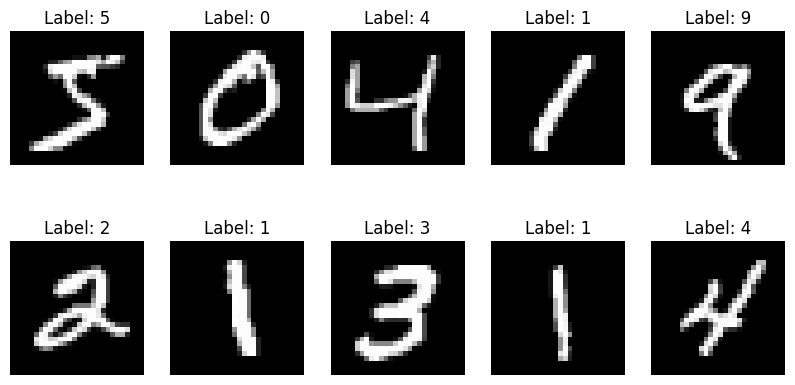

First 10 labels: [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [18]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define transform (convert image to tensor)
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load MNIST dataset
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Print dataset info
print("Number of training samples:", len(train_data))

# Display a few sample images and labels
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    image, label = train_data[i]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.show()

# Print first few labels
labels = [train_data[i][1] for i in range(10)]
print("First 10 labels:", labels)


Number of samples after filtering (0s and 1s): 12665


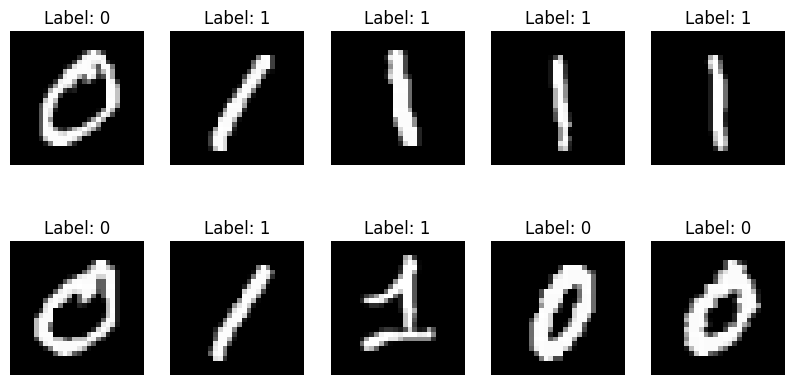

First 10 labels in filtered dataset: [0, 1, 1, 1, 1, 0, 1, 1, 0, 0]


In [19]:
# Filter dataset to keep only digits 0 and 1
filtered_indices = [i for i, (_, label) in enumerate(train_data) if label in [0, 1]]
filtered_data = torch.utils.data.Subset(train_data, filtered_indices)

print("Number of samples after filtering (0s and 1s):", len(filtered_data))

# Display few filtered images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    image, label = filtered_data[i]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.show()

# Print first few labels from filtered dataset
labels = [filtered_data[i][1] for i in range(10)]
print("First 10 labels in filtered dataset:", labels)


In [20]:
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

# Split filtered dataset into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(filtered_data))
test_size = len(filtered_data) - train_size
train_data, test_data = random_split(filtered_data, [train_size, test_size])

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(28*28, 1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        return torch.sigmoid(self.linear(x))

model = LogisticRegressionModel()

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train the model
for epoch in range(5):
    total_loss = 0.0
    for images, labels in train_loader:
        labels = labels.float().view(-1, 1)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/5], Loss: {total_loss/len(train_loader):.4f}")

# Test accuracy
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted.view(-1) == labels).sum().item()

print(f"\nTest Accuracy: {100 * correct / total:.2f}%")

# Count number of 0s and 1s in train and test datasets
train_labels = [label for _, label in train_data]
test_labels = [label for _, label in test_data]

num_zeros_train = train_labels.count(0)
num_ones_train = train_labels.count(1)
num_zeros_test = test_labels.count(0)
num_ones_test = test_labels.count(1)

print(f"\nTraining set: {num_zeros_train} zeros, {num_ones_train} ones")
print(f"Testing set:  {num_zeros_test} zeros, {num_ones_test} ones")


Epoch [1/5], Loss: 0.0472
Epoch [2/5], Loss: 0.0140
Epoch [3/5], Loss: 0.0106
Epoch [4/5], Loss: 0.0090
Epoch [5/5], Loss: 0.0080

Test Accuracy: 99.84%

Training set: 4699 zeros, 5433 ones
Testing set:  1224 zeros, 1309 ones
